In [1]:
!pip install pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [3]:
df = pd.read_csv("train.csv")  
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.fillna(df.mean(numeric_only=True), inplace=True)

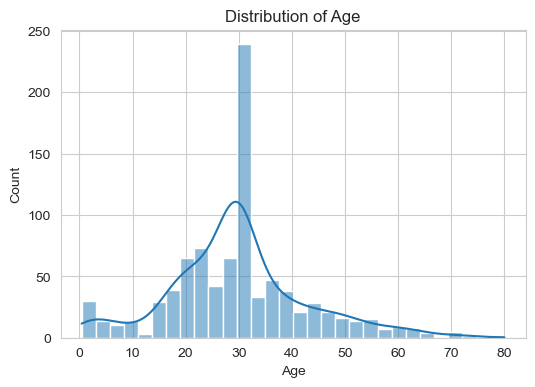

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.title("Distribution of Age")
plt.show()


### Observation: Age Distribution

- Most passengers were between 20–40 years old.
- The distribution is slightly right-skewed.
- There are fewer elderly passengers compared to young adults.
- Some missing values were present in the Age column.
- Children (below 10 years) are fewer in number.


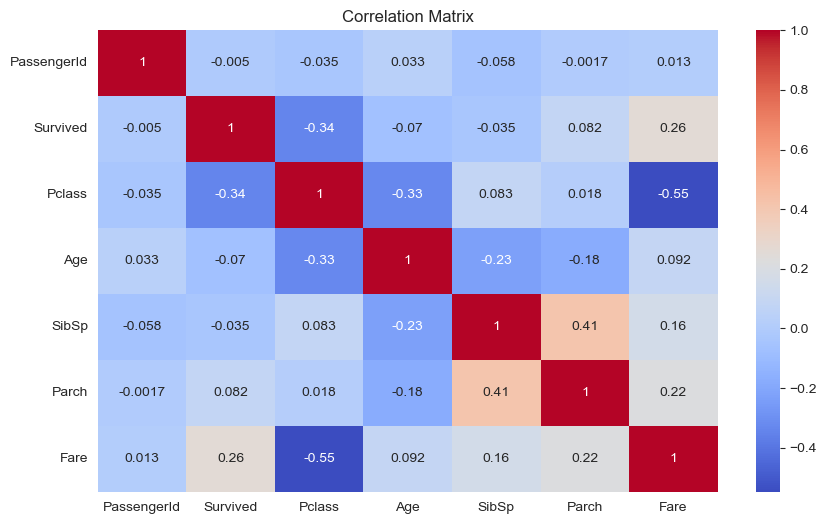

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Observation: Correlation Matrix

- Fare and Pclass show strong negative correlation.
- Survived has positive correlation with Fare.
- Survived has negative correlation with Pclass.
- Age shows weak correlation with survival.
- SibSp and Parch have slight positive correlation.


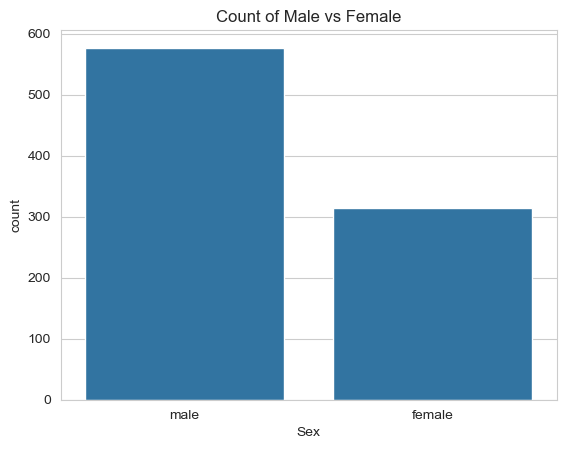

In [13]:
sns.countplot(x='Sex', data=df)
plt.title("Count of Male vs Female")
plt.show()

### Observation: Gender Distribution

- Male passengers are significantly higher than female passengers.
- The dataset is male-dominated.
- Gender could be an important factor affecting survival.


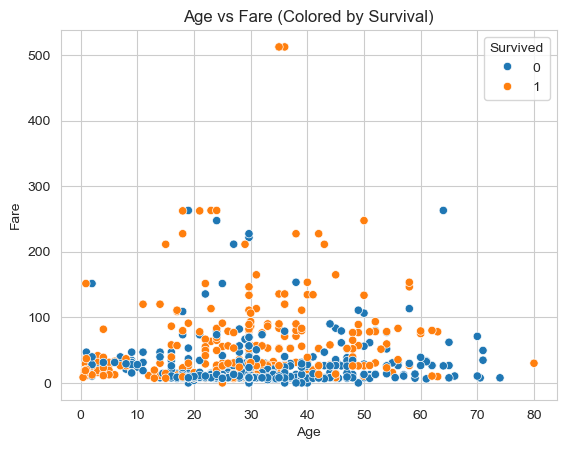

In [14]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare (Colored by Survival)")
plt.show()

### Observation: Age vs Fare (Survival Analysis)

- Passengers who paid higher fares had better survival rates.
- Most low-fare passengers did not survive.
- No strong relationship between Age and Fare.
- Survival appears more influenced by Fare (class) than Age.


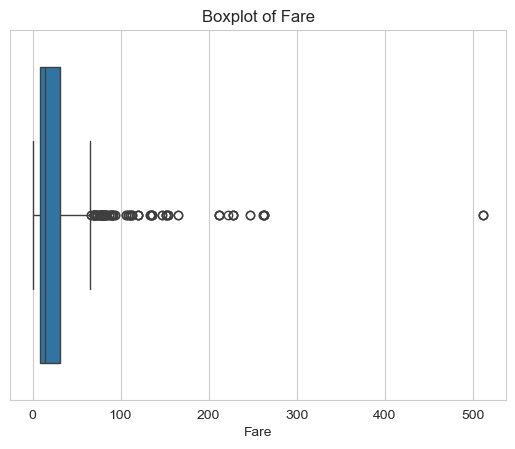

In [16]:
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")
plt.show()


### Observation: Fare Distribution

- Fare distribution is highly right-skewed.
- Several extreme outliers are visible.
- Majority of passengers paid lower fares.
- A small number of passengers paid very high ticket prices.


## Final Summary

- The dataset contains 891 rows and 12 columns.
- Missing values were handled using mean imputation and cleaning techniques.
- Most passengers were between 20–40 years old.
- Male passengers were more than female passengers.
- Survival rate was less than 50%.
- Fare and Pclass show strong relationship with survival.
- Passengers who paid higher fares (higher class) had better survival chances.
- Fare column contains significant outliers.
- Age has weak impact on survival compared to class and fare.

### Major Insight:
Passenger class and ticket fare played a crucial role in survival probability during the Titanic disaster.
